In [1]:
import pandas as pd

In [2]:
main = pd.read_csv('FinalDataset1.csv')

In [3]:
main .head()

,datetime,open,high,low,close,tick_volume,CPI_month_tag,CPI_Actual,CPI_Forecast,CPI_Previous,...,InterestRate_Forecast,InterestRate_Previous,PPI_month_tag,PPI_Actual,PPI_Forecast,PPI_Previous,PCE_month_tag,PCE_Actual,PCE_Forecast,PCE_Previous
0,2018-01-02 01:00:00,1302.96,1306.30,1302.26,1306.23,2497,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02 01:30:00,1306.22,1307.68,1306.14,1306.79,2325,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-02 02:00:00,1306.79,1306.88,1305.27,1305.90,2214,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-02 02:30:00,1305.91,1307.30,1305.89,1306.34,2686,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-02 03:00:00,1306.33,1306.46,1304.23,1306.26,4656,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# candletype column
main['candletype'] = np.where(main['close'] > main['open'], 'up', 'down')

# body column: absolute difference between open and close
main['body'] = (main['close'] - main['open']).abs()

# upperwick column
main['upperwick'] = np.where(
    main['candletype'] == 'up',
    main['high'] - main['close'],
    main['high'] - main['open']
)

# lowerwick column
main['lowerwick'] = np.where(
    main['candletype'] == 'up',
    main['open'] - main['low'],
    main['close'] - main['low']
)


In [20]:
main.columns

Index(['datetime', 'open', 'high', 'low', 'close', 'tick_volume',
       'CPI_month_tag', 'CPI_Actual', 'CPI_Forecast', 'CPI_Previous',
       'CPI_in_Price_data', 'GDP_quarter_tag', 'GDP_Actual', 'GDP_Forecast',
       'GDP_Previous', 'NFP_month_tag', 'NFP_Actual', 'NFP_Forecast',
       'NFP_Previous', 'InterestRate_Actual', 'InterestRate_Forecast',
       'InterestRate_Previous', 'PPI_month_tag', 'PPI_Actual', 'PPI_Forecast',
       'PPI_Previous', 'PCE_month_tag', 'PCE_Actual', 'PCE_Forecast',
       'PCE_Previous', 'candletype', 'body', 'upperwick', 'lowerwick'],
      dtype='object')

In [41]:
cpiStrategy = main[['datetime', 'open', 'high', 'low', 'close', 'candletype', 'body', 'upperwick', 'lowerwick', 'tick_volume', 'CPI_Actual']]
gdpStrategy = main[['datetime', 'open', 'high', 'low', 'close', 'candletype', 'body', 'upperwick', 'lowerwick', 'tick_volume', 'GDP_Actual']]
interestrateStrategy = main[['datetime', 'open', 'high', 'low', 'close', 'candletype', 'body', 'upperwick', 'lowerwick', 'tick_volume', 'InterestRate_Actual']]
nfpStrategy = main[['datetime', 'open', 'high', 'low', 'close', 'candletype', 'body', 'upperwick', 'lowerwick', 'tick_volume', 'NFP_Actual']]
ppiStrategy = main[['datetime', 'open', 'high', 'low', 'close', 'candletype', 'body', 'upperwick', 'lowerwick', 'tick_volume', 'PPI_Actual']]
pceStrategy = main[['datetime', 'open', 'high', 'low', 'close', 'candletype', 'body', 'upperwick', 'lowerwick', 'tick_volume', 'PCE_Actual']]

In [22]:
cpiStrategy.head()

,datetime,open,high,low,close,candletype,body,upperwick,lowerwick,tick_volume,CPI_Actual
0,2018-01-02 01:00:00,1302.96,1306.30,1302.26,1306.23,up,3.27,0.07,0.70,2497,NaN
1,2018-01-02 01:30:00,1306.22,1307.68,1306.14,1306.79,up,0.57,0.89,0.08,2325,NaN
2,2018-01-02 02:00:00,1306.79,1306.88,1305.27,1305.90,down,0.89,0.09,0.63,2214,NaN
3,2018-01-02 02:30:00,1305.91,1307.30,1305.89,1306.34,up,0.43,0.96,0.02,2686,NaN
4,2018-01-02 03:00:00,1306.33,1306.46,1304.23,1306.26,down,0.07,0.13,2.03,4656,NaN


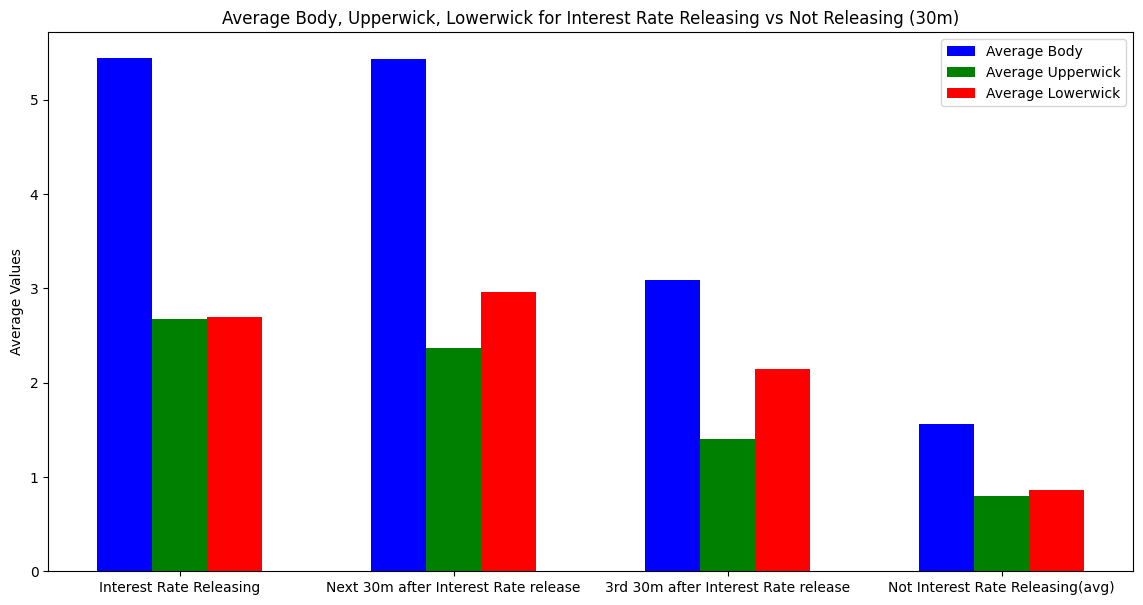

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming interestrateStrategy is your original DataFrame

# Create a mask for InterestRate_Actual being null or not null
ir_not_null = interestrateStrategy[interestrateStrategy['InterestRate_Actual'].notna()]
ir_null = interestrateStrategy[interestrateStrategy['InterestRate_Actual'].isna()]

# Get the indices of InterestRate Not Null rows and their immediate next rows
next_rows_indices = ir_not_null.index + 1  # Get the next row's indices
next2_rows_indices = ir_not_null.index + 2  # Get the next2 row's indices

# Remove the rows that follow the InterestRate Not Null rows from the InterestRate Null set
ir_null = ir_null[~ir_null.index.isin(next_rows_indices)]
ir_null = ir_null[~ir_null.index.isin(next2_rows_indices)]

# Calculate average values for each group (Interest Rate Not Null)
avg_body_ir_not_null = ir_not_null['body'].mean()
avg_upperwick_ir_not_null = ir_not_null['upperwick'].mean()
avg_lowerwick_ir_not_null = ir_not_null['lowerwick'].mean()

# Calculate average values for the immediate next rows (InterestRate Next Row)
ir_next_row = interestrateStrategy.loc[next_rows_indices]
avg_body_ir_next_row = ir_next_row['body'].mean()
avg_upperwick_ir_next_row = ir_next_row['upperwick'].mean()
avg_lowerwick_ir_next_row = ir_next_row['lowerwick'].mean()

# Calculate average values for the second next rows (InterestRate Next2 Row)
ir_next2_row = interestrateStrategy.loc[next2_rows_indices]
avg_body_ir_next2_row = ir_next2_row['body'].mean()
avg_upperwick_ir_next2_row = ir_next2_row['upperwick'].mean()
avg_lowerwick_ir_next2_row = ir_next2_row['lowerwick'].mean()

# Calculate average values for the 'Not Interest Rate Releasing' set (excluding next rows)
avg_body_ir_null = ir_null['body'].mean()
avg_upperwick_ir_null = ir_null['upperwick'].mean()
avg_lowerwick_ir_null = ir_null['lowerwick'].mean()

# Data for plotting
categories = ['Interest Rate Releasing', 'Next 30m after Interest Rate release', '3rd 30m after Interest Rate release', 'Not Interest Rate Releasing(avg)']
avg_body = [avg_body_ir_not_null, avg_body_ir_next_row, avg_body_ir_next2_row, avg_body_ir_null]
avg_upperwick = [avg_upperwick_ir_not_null, avg_upperwick_ir_next_row, avg_upperwick_ir_next2_row, avg_upperwick_ir_null]
avg_lowerwick = [avg_lowerwick_ir_not_null, avg_lowerwick_ir_next_row, avg_lowerwick_ir_next2_row, avg_lowerwick_ir_null]

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

# Bar plot for each feature
width = 0.2  # Bar width
x = range(len(categories))

ax.bar([p - width for p in x], avg_body, width=width, label='Average Body', color='blue')
ax.bar(x, avg_upperwick, width=width, label='Average Upperwick', color='green')
ax.bar([p + width for p in x], avg_lowerwick, width=width, label='Average Lowerwick', color='red')

# Set labels and title
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel('Average Values')
ax.set_title('Average Body, Upperwick, Lowerwick for Interest Rate Releasing vs Not Releasing (30m)')
ax.legend()

plt.show()


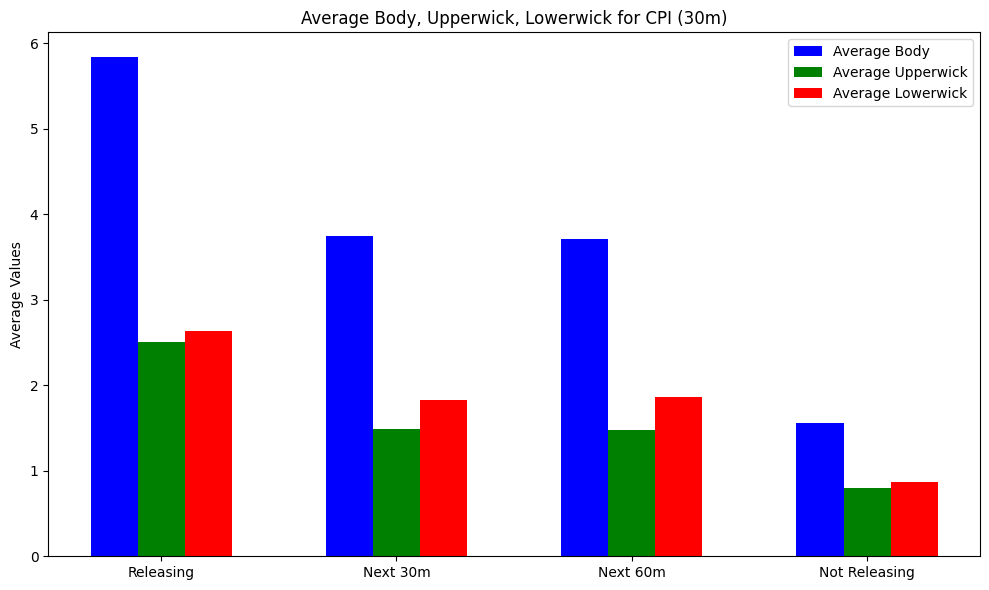

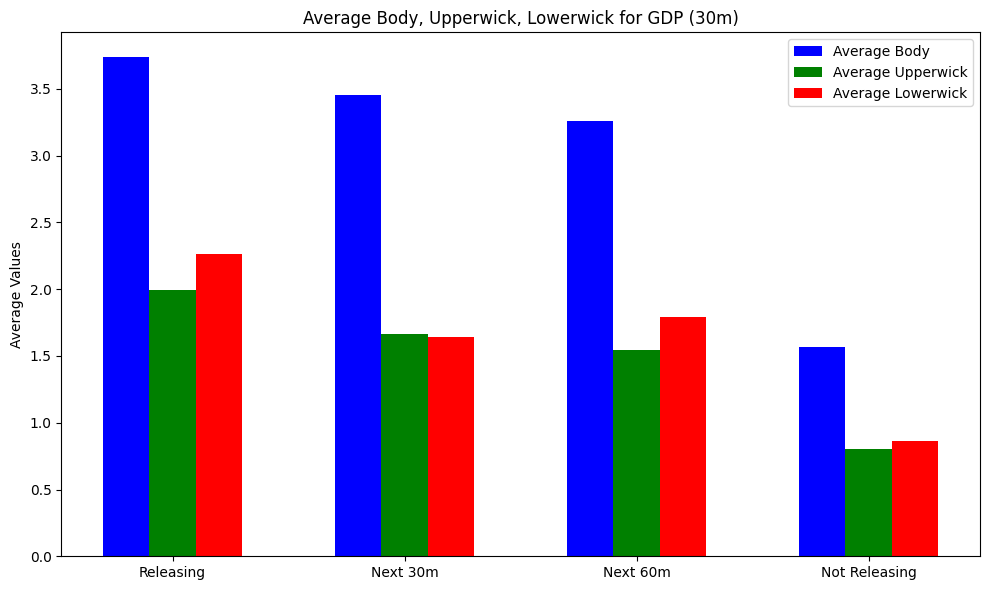

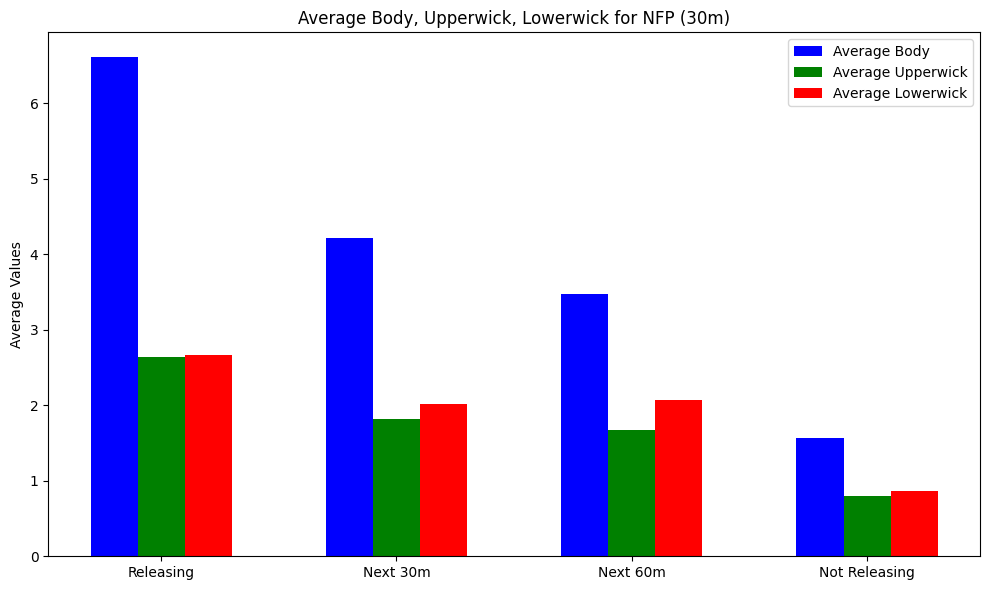

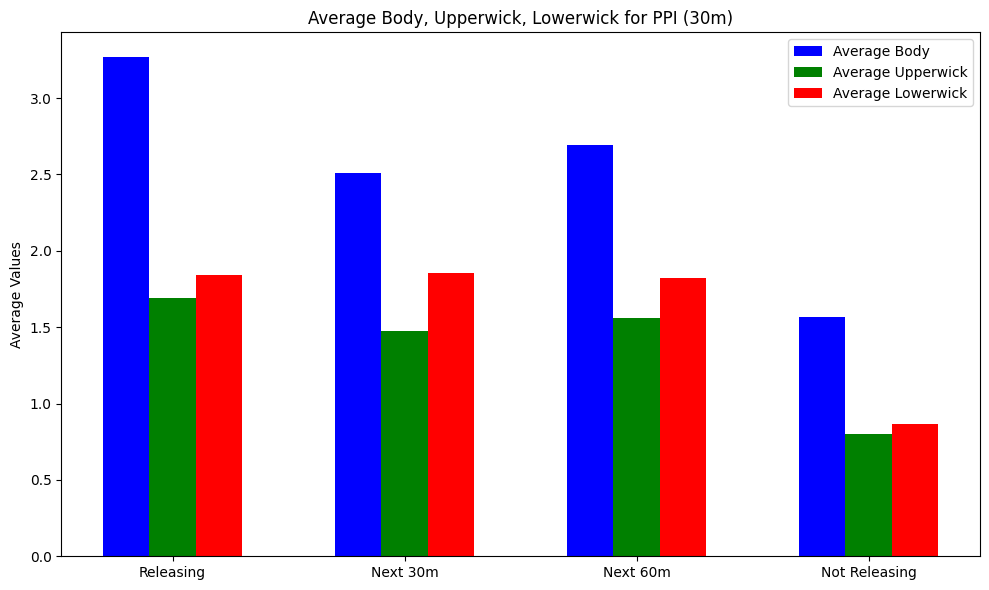

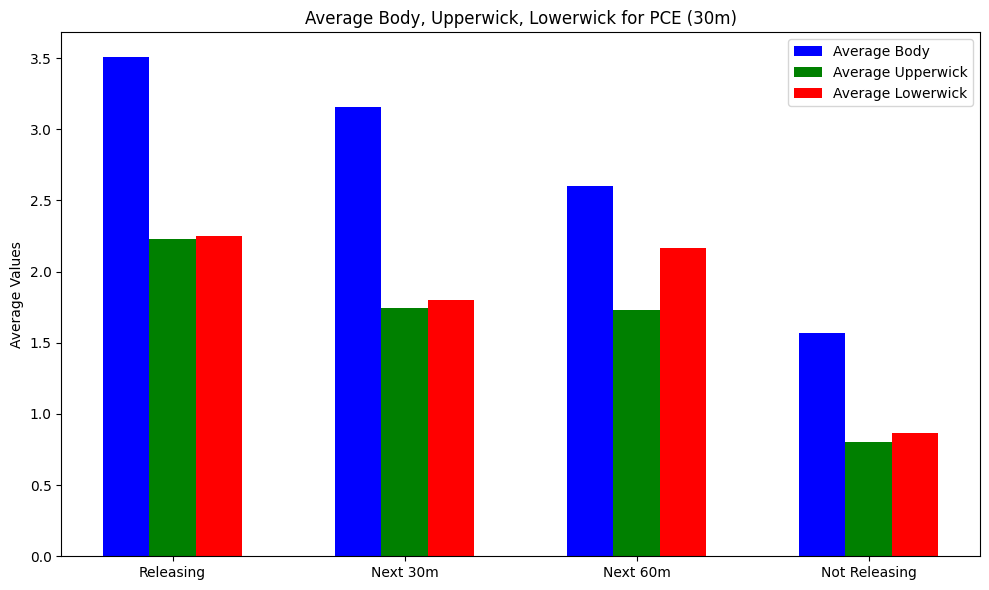

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# List of strategies for each macroeconomic indicator
strategies = {
    'CPI': cpiStrategy,
    'GDP': gdpStrategy,
    # 'Interest Rate': interestrateStrategy,
    'NFP': nfpStrategy,
    'PPI': ppiStrategy,
    'PCE': pceStrategy
}

# Loop through each strategy (macro indicator)
for name, strategy in strategies.items():
    # Create a mask for the macroeconomic indicator being null or not null
    not_null = strategy[strategy[f'{name}_Actual'].notna()]
    null = strategy[strategy[f'{name}_Actual'].isna()]

    # Get the indices of the Not Null rows and their immediate next rows
    next_rows_indices = not_null.index + 1
    next2_rows_indices = not_null.index + 2

    # Remove the rows that follow the Not Null rows from the Null set
    null = null[~null.index.isin(next_rows_indices)]
    null = null[~null.index.isin(next2_rows_indices)]

    # Calculate average values for each group (releasing data)
    avg_body_not_null = not_null['body'].mean()
    avg_upperwick_not_null = not_null['upperwick'].mean()
    avg_lowerwick_not_null = not_null['lowerwick'].mean()

    # Calculate average values for the immediate next row (next 30 minutes)
    next_row = strategy.loc[next_rows_indices]
    avg_body_next_row = next_row['body'].mean()
    avg_upperwick_next_row = next_row['upperwick'].mean()
    avg_lowerwick_next_row = next_row['lowerwick'].mean()

    # Calculate average values for the third next row (next 60 minutes)
    next2_row = strategy.loc[next2_rows_indices]
    avg_body_next2_row = next2_row['body'].mean()
    avg_upperwick_next2_row = next2_row['upperwick'].mean()
    avg_lowerwick_next2_row = next2_row['lowerwick'].mean()

    # Calculate average values for the 'Not Releasing' set (excluding next rows)
    avg_body_null = null['body'].mean()
    avg_upperwick_null = null['upperwick'].mean()
    avg_lowerwick_null = null['lowerwick'].mean()

    # Data for plotting
    categories = ['Releasing', 'Next 30m', 'Next 60m', 'Not Releasing']
    avg_body = [avg_body_not_null, avg_body_next_row, avg_body_next2_row, avg_body_null]
    avg_upperwick = [avg_upperwick_not_null, avg_upperwick_next_row, avg_upperwick_next2_row, avg_upperwick_null]
    avg_lowerwick = [avg_lowerwick_not_null, avg_lowerwick_next_row, avg_lowerwick_next2_row, avg_lowerwick_null]

    # Plotting each macroeconomic indicator in separate plots
    fig, ax = plt.subplots(figsize=(10, 6))

    # Bar width
    width = 0.2
    x = range(len(categories))

    ax.bar([p - width for p in x], avg_body, width=width, label='Average Body', color='blue')
    ax.bar(x, avg_upperwick, width=width, label='Average Upperwick', color='green')
    ax.bar([p + width for p in x], avg_lowerwick, width=width, label='Average Lowerwick', color='red')

    # Set labels and title
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.set_ylabel('Average Values')
    ax.set_title(f'Average Body, Upperwick, Lowerwick for {name} (30m)')
    ax.legend()

    # Show plot
    plt.tight_layout()
    plt.show()


In [44]:
# Check the columns for each strategy
print(cpiStrategy.columns)
print(gdpStrategy.columns)
print(interestrateStrategy.columns)
print(nfpStrategy.columns)
print(ppiStrategy.columns)
print(pceStrategy.columns)


Index(['datetime', 'open', 'high', 'low', 'close', 'candletype', 'body',
       'upperwick', 'lowerwick', 'tick_volume', 'CPI_Actual'],
      dtype='object')
Index(['datetime', 'open', 'high', 'low', 'close', 'candletype', 'body',
       'upperwick', 'lowerwick', 'tick_volume', 'GDP_Actual'],
      dtype='object')
Index(['datetime', 'open', 'high', 'low', 'close', 'candletype', 'body',
       'upperwick', 'lowerwick', 'tick_volume', 'InterestRate_Actual'],
      dtype='object')
Index(['datetime', 'open', 'high', 'low', 'close', 'candletype', 'body',
       'upperwick', 'lowerwick', 'tick_volume', 'NFP_Actual'],
      dtype='object')
Index(['datetime', 'open', 'high', 'low', 'close', 'candletype', 'body',
       'upperwick', 'lowerwick', 'tick_volume', 'PPI_Actual'],
      dtype='object')
Index(['datetime', 'open', 'high', 'low', 'close', 'candletype', 'body',
       'upperwick', 'lowerwick', 'tick_volume', 'PCE_Actual'],
      dtype='object')


In [23]:
cpiStrategy_not_null = cpiStrategy[cpiStrategy['CPI_Actual'].notnull()]

In [24]:
cpiStrategy_not_null.head()

,datetime,open,high,low,close,candletype,body,upperwick,lowerwick,tick_volume,CPI_Actual
399,2018-01-12 16:30:00,1327.99,1328.21,1325.73,1327.16,down,0.83,0.22,1.43,11237,0.021
1450,2018-02-14 16:30:00,1333.06,1336.16,1331.29,1333.93,up,0.87,2.23,1.77,22518,0.021
2315,2018-03-13 15:30:00,1317.47,1327.00,1313.81,1324.73,up,7.26,2.27,3.66,26203,0.022
3235,2018-04-11 15:30:00,1351.53,1355.21,1351.53,1352.57,up,1.04,2.64,0.00,14597,0.024
4201,2018-05-10 15:30:00,1318.23,1322.67,1318.19,1321.99,up,3.76,0.68,0.04,19157,0.025


In [26]:
import numpy as np

# Get the indices where CPI_Actual is not null
not_null_indices = cpiStrategy.index[cpiStrategy['CPI_Actual'].notnull()]

# Create an empty set to hold indices of rows to keep
rows_to_keep = set()

# For each index where CPI_Actual is not null, add that index plus next 2 indices
for idx in not_null_indices:
    rows_to_keep.update([idx, idx+1, idx+2])

# Filter out any indices that are beyond the length of the DataFrame
rows_to_keep = [i for i in rows_to_keep if i < len(cpiStrategy)]

# Create the filtered DataFrame with these rows
min30_strategy_data = cpiStrategy.loc[sorted(rows_to_keep)]

min30_strategy_data


,datetime,open,high,low,close,candletype,body,upperwick,lowerwick,tick_volume,CPI_Actual
399,2018-01-12 16:30:00,1327.99,1328.21,1325.73,1327.16,down,0.83,0.22,1.43,11237,0.021
400,2018-01-12 17:00:00,1327.16,1329.05,1327.05,1328.78,up,1.62,0.27,0.11,9539,NaN
401,2018-01-12 17:30:00,1328.78,1332.38,1328.75,1331.33,up,2.55,1.05,0.03,11500,NaN
1450,2018-02-14 16:30:00,1333.06,1336.16,1331.29,1333.93,up,0.87,2.23,1.77,22518,0.021
1451,2018-02-14 17:00:00,1333.88,1346.34,1333.87,1344.40,up,10.52,1.94,0.01,26972,NaN
...,...,...,...,...,...,...,...,...,...,...,...
85045,2025-03-12 16:00:00,2917.50,2918.80,2906.17,2910.94,down,6.56,1.30,4.77,6589,NaN
85046,2025-03-12 16:30:00,2910.94,2917.66,2909.93,2915.77,up,4.83,1.89,1.01,6578,NaN
86010,2025-04-10 15:30:00,3126.38,3134.02,3116.14,3123.13,down,3.25,7.64,6.99,7052,0.024
86011,2025-04-10 16:00:00,3123.13,3136.74,3121.00,3132.85,up,9.72,3.89,2.13,5951,NaN


In [27]:
min30_strategy_data.shape

(261, 11)

In [10]:
# candletype column
cpiStrategy['candletype'] = np.where(cpiStrategy['close'] > cpiStrategy['open'], 'up', 'down')

# body column: absolute difference between open and close
cpiStrategy['body'] = (cpiStrategy['close'] - cpiStrategy['open']).abs()

# upperwick column
cpiStrategy['upperwick'] = np.where(
    cpiStrategy['candletype'] == 'up',
    cpiStrategy['high'] - cpiStrategy['close'],
    cpiStrategy['high'] - cpiStrategy['open']
)

# lowerwick column
cpiStrategy['lowerwick'] = np.where(
    cpiStrategy['candletype'] == 'up',
    cpiStrategy['open'] - cpiStrategy['low'],
    cpiStrategy['close'] - cpiStrategy['low']
)


C:\Users\Nuwantha\AppData\Local\Temp\ipykernel_26940\1586997370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpiStrategy['candletype'] = np.where(cpiStrategy['close'] > cpiStrategy['open'], 'up', 'down')
C:\Users\Nuwantha\AppData\Local\Temp\ipykernel_26940\1586997370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpiStrategy['body'] = (cpiStrategy['close'] - cpiStrategy['open']).abs()
C:\Users\Nuwantha\AppData\Local\Temp\ipykernel_26940\1586997370.py:8: SettingWithCopyWarning: 
A value is trying

In [11]:
result.head(10)

,datetime,open,high,low,close,tick_volume,CPI_Actual
399,2018-01-12 16:30:00,1327.99,1328.21,1325.73,1327.16,11237,0.021
400,2018-01-12 17:00:00,1327.16,1329.05,1327.05,1328.78,9539,NaN
401,2018-01-12 17:30:00,1328.78,1332.38,1328.75,1331.33,11500,NaN
1450,2018-02-14 16:30:00,1333.06,1336.16,1331.29,1333.93,22518,0.021
1451,2018-02-14 17:00:00,1333.88,1346.34,1333.87,1344.40,26972,NaN
1452,2018-02-14 17:30:00,1344.41,1349.41,1344.32,1348.36,19864,NaN
2315,2018-03-13 15:30:00,1317.47,1327.00,1313.81,1324.73,26203,0.022
2316,2018-03-13 16:00:00,1324.68,1327.30,1324.42,1325.01,15416,NaN
2317,2018-03-13 16:30:00,1325.04,1326.43,1324.74,1325.58,12478,NaN
3235,2018-04-11 15:30:00,1351.53,1355.21,1351.53,1352.57,14597,0.024


In [12]:
import numpy as np

# Get the indices where CPI_Actual is not null
not_null_indices = cpiStrategy.index[cpiStrategy['CPI_Actual'].notnull()]

# Create an empty set to hold indices of rows to keep
rows_to_keep = set()

# For each index where CPI_Actual is not null, add that index plus next 2 indices
for idx in not_null_indices:
    rows_to_keep.update([idx, idx+1, idx+2])

# Filter out any indices that are beyond the length of the DataFrame
rows_to_keep = [i for i in rows_to_keep if i < len(cpiStrategy)]

# Create the filtered DataFrame with these rows
result = cpiStrategy.loc[sorted(rows_to_keep)]

result


,datetime,open,high,low,close,tick_volume,CPI_Actual,candletype,body,upperwick,lowerwick
399,2018-01-12 16:30:00,1327.99,1328.21,1325.73,1327.16,11237,0.021,down,0.83,0.22,1.43
400,2018-01-12 17:00:00,1327.16,1329.05,1327.05,1328.78,9539,NaN,up,1.62,0.27,0.11
401,2018-01-12 17:30:00,1328.78,1332.38,1328.75,1331.33,11500,NaN,up,2.55,1.05,0.03
1450,2018-02-14 16:30:00,1333.06,1336.16,1331.29,1333.93,22518,0.021,up,0.87,2.23,1.77
1451,2018-02-14 17:00:00,1333.88,1346.34,1333.87,1344.40,26972,NaN,up,10.52,1.94,0.01
...,...,...,...,...,...,...,...,...,...,...,...
85045,2025-03-12 16:00:00,2917.50,2918.80,2906.17,2910.94,6589,NaN,down,6.56,1.30,4.77
85046,2025-03-12 16:30:00,2910.94,2917.66,2909.93,2915.77,6578,NaN,up,4.83,1.89,1.01
86010,2025-04-10 15:30:00,3126.38,3134.02,3116.14,3123.13,7052,0.024,down,3.25,7.64,6.99
86011,2025-04-10 16:00:00,3123.13,3136.74,3121.00,3132.85,5951,NaN,up,9.72,3.89,2.13


In [13]:
import numpy as np

# Create the 'candle_number' column with repeating sequence of 1, 2, 3
result['candle_number'] = np.tile([1, 2, 3], len(result) // 3 + 1)[:len(result)]



In [14]:
result.head(10)

,datetime,open,high,low,close,tick_volume,CPI_Actual,candletype,body,upperwick,lowerwick,candle_number
399,2018-01-12 16:30:00,1327.99,1328.21,1325.73,1327.16,11237,0.021,down,0.83,0.22,1.43,1
400,2018-01-12 17:00:00,1327.16,1329.05,1327.05,1328.78,9539,NaN,up,1.62,0.27,0.11,2
401,2018-01-12 17:30:00,1328.78,1332.38,1328.75,1331.33,11500,NaN,up,2.55,1.05,0.03,3
1450,2018-02-14 16:30:00,1333.06,1336.16,1331.29,1333.93,22518,0.021,up,0.87,2.23,1.77,1
1451,2018-02-14 17:00:00,1333.88,1346.34,1333.87,1344.40,26972,NaN,up,10.52,1.94,0.01,2
1452,2018-02-14 17:30:00,1344.41,1349.41,1344.32,1348.36,19864,NaN,up,3.95,1.05,0.09,3
2315,2018-03-13 15:30:00,1317.47,1327.00,1313.81,1324.73,26203,0.022,up,7.26,2.27,3.66,1
2316,2018-03-13 16:00:00,1324.68,1327.30,1324.42,1325.01,15416,NaN,up,0.33,2.29,0.26,2
2317,2018-03-13 16:30:00,1325.04,1326.43,1324.74,1325.58,12478,NaN,up,0.54,0.85,0.30,3
3235,2018-04-11 15:30:00,1351.53,1355.21,1351.53,1352.57,14597,0.024,up,1.04,2.64,0.00,1


In [15]:
result['datetime'] = pd.to_datetime(result['datetime'])

# Create a new column 'month' by extracting the month from the 'datetime' column
result['month'] = result['datetime'].dt.month

In [16]:
result.head(10)

,datetime,open,high,low,close,tick_volume,CPI_Actual,candletype,body,upperwick,lowerwick,candle_number,month
399,2018-01-12 16:30:00,1327.99,1328.21,1325.73,1327.16,11237,0.021,down,0.83,0.22,1.43,1,1
400,2018-01-12 17:00:00,1327.16,1329.05,1327.05,1328.78,9539,NaN,up,1.62,0.27,0.11,2,1
401,2018-01-12 17:30:00,1328.78,1332.38,1328.75,1331.33,11500,NaN,up,2.55,1.05,0.03,3,1
1450,2018-02-14 16:30:00,1333.06,1336.16,1331.29,1333.93,22518,0.021,up,0.87,2.23,1.77,1,2
1451,2018-02-14 17:00:00,1333.88,1346.34,1333.87,1344.40,26972,NaN,up,10.52,1.94,0.01,2,2
1452,2018-02-14 17:30:00,1344.41,1349.41,1344.32,1348.36,19864,NaN,up,3.95,1.05,0.09,3,2
2315,2018-03-13 15:30:00,1317.47,1327.00,1313.81,1324.73,26203,0.022,up,7.26,2.27,3.66,1,3
2316,2018-03-13 16:00:00,1324.68,1327.30,1324.42,1325.01,15416,NaN,up,0.33,2.29,0.26,2,3
2317,2018-03-13 16:30:00,1325.04,1326.43,1324.74,1325.58,12478,NaN,up,0.54,0.85,0.30,3,3
3235,2018-04-11 15:30:00,1351.53,1355.21,1351.53,1352.57,14597,0.024,up,1.04,2.64,0.00,1,4


In [17]:
import pandas as pd

# Function to get the min and max values for the first two rows based on candle_number for each month
def get_min_max(group):
    # Filter the group to only include rows with candle_number 1 and 2
    first_two_rows = group[group['candle_number'].isin([1, 2])]
    
    # Calculate min(low) and max(high) for the first two rows
    min_low = first_two_rows['low'].min()
    max_high = first_two_rows['high'].max()
    
    # Return as a Series to be added as new columns
    return pd.Series({'min_low': min_low, 'max_high': max_high})

# Apply the function to each group (month) and assign the results to new columns
result[['min_low', 'max_high']] = result.groupby('month').apply(get_min_max)

# Display the first few rows of the updated DataFrame
print(result.head(10))


                datetime     open     high      low    close  tick_volume  \
399  2018-01-12 16:30:00  1327.99  1328.21  1325.73  1327.16        11237   
400  2018-01-12 17:00:00  1327.16  1329.05  1327.05  1328.78         9539   
401  2018-01-12 17:30:00  1328.78  1332.38  1328.75  1331.33        11500   
1450 2018-02-14 16:30:00  1333.06  1336.16  1331.29  1333.93        22518   
1451 2018-02-14 17:00:00  1333.88  1346.34  1333.87  1344.40        26972   
1452 2018-02-14 17:30:00  1344.41  1349.41  1344.32  1348.36        19864   
2315 2018-03-13 15:30:00  1317.47  1327.00  1313.81  1324.73        26203   
2316 2018-03-13 16:00:00  1324.68  1327.30  1324.42  1325.01        15416   
2317 2018-03-13 16:30:00  1325.04  1326.43  1324.74  1325.58        12478   
3235 2018-04-11 15:30:00  1351.53  1355.21  1351.53  1352.57        14597   

      CPI_Actual candletype   body  upperwick  lowerwick  candle_number  \
399        0.021       down   0.83       0.22       1.43              1   
40

C:\Users\Nuwantha\AppData\Local\Temp\ipykernel_26940\155597646.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result[['min_low', 'max_high']] = result.groupby('month').apply(get_min_max)


In [18]:
result.head()

,datetime,open,high,low,close,tick_volume,CPI_Actual,candletype,body,upperwick,lowerwick,candle_number,month,min_low,max_high
399,2018-01-12 16:30:00,1327.99,1328.21,1325.73,1327.16,11237,0.021,down,0.83,0.22,1.43,1,1,NaN,NaN
400,2018-01-12 17:00:00,1327.16,1329.05,1327.05,1328.78,9539,NaN,up,1.62,0.27,0.11,2,1,NaN,NaN
401,2018-01-12 17:30:00,1328.78,1332.38,1328.75,1331.33,11500,NaN,up,2.55,1.05,0.03,3,1,NaN,NaN
1450,2018-02-14 16:30:00,1333.06,1336.16,1331.29,1333.93,22518,0.021,up,0.87,2.23,1.77,1,2,NaN,NaN
1451,2018-02-14 17:00:00,1333.88,1346.34,1333.87,1344.40,26972,NaN,up,10.52,1.94,0.01,2,2,NaN,NaN
